In [1]:
import graph_tool.all as gt
from sbm import sbm
# from sbmtm import sbmtm



(ipykernel_launcher:65819): Gtk-WARNING **: 10:19:55.732: Locale not supported by C library.
	Using the fallback 'C' locale.


In [2]:
# model = sbmMorb()
model = sbm()

graph_title = "multi1000PatientDiseases.gt.gz"
admin_num = 1000
model.make_graph(admin_num=admin_num, multi=True)

model.save_graph(filename=graph_title)


In [4]:
print(gt.is_bipartite(model.g))

True


In [45]:
state = gt.minimize_nested_blockmodel_dl(model.g)
gt.mcmc_equilibrate(state, wait=100, mcmc_args=dict(niter=10))

state.print_summary()
print(state.entropy())
gt.draw_hierarchy(state, subsample_edges=1000, layout = "bipartite",output="min.pdf")

l: 0, N: 2131, B: 10
l: 1, N: 10, B: 4
l: 2, N: 4, B: 2
l: 3, N: 2, B: 1
l: 4, N: 1, B: 1
43513.358465663136


(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x16d000be0, at 0x16ceaa370>,
 <Graph object, directed, with 2148 vertices and 2147 edges, at 0x16e3c36a0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x16e3c36a0, at 0x16cff06d0>)

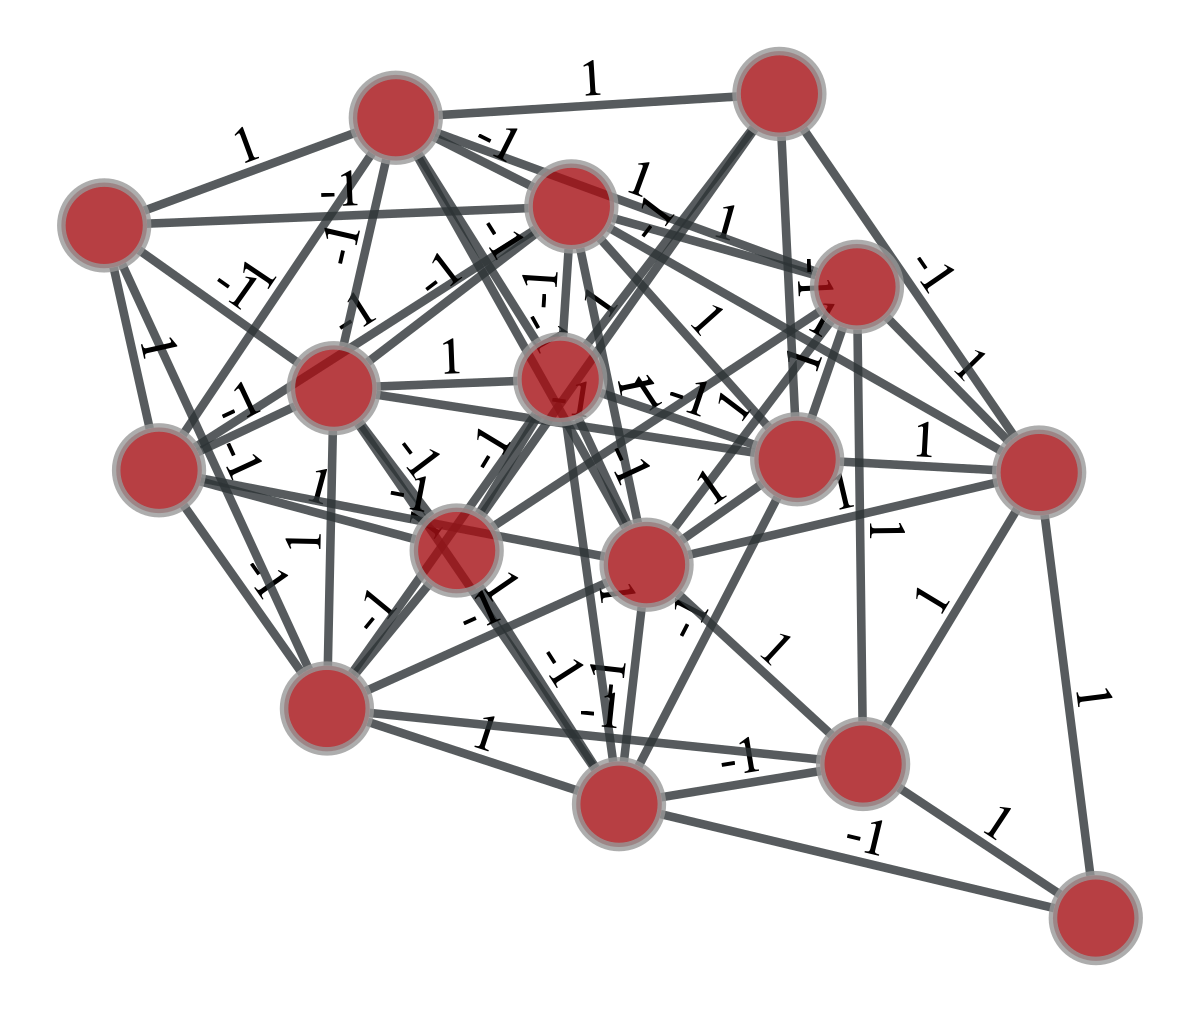

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x16d457df0, at 0x16e44c040>

In [23]:
g1 = gt.collection.ns["new_guinea_tribes"]
# g1.list_properties()
# for e in g1.iter_edges():
#     print(e)
    # print(g1.ep.weight[e])

# e = g1.edges().next()
# print(g1.ep.weight[e])

gt.graph_draw(g1, edge_text=g1.ep.weight)


In [28]:
import csv

demographics = set()


with open('admission_patients_demograhics_morbidities.csv') as csv_file:
            csv_reader = csv.DictReader(csv_file, delimiter=',')
            count = 0
            for row in csv_reader:
                demographics.add(row['ethnicity_grouped'])
print(demographics)

{'hispanic', 'white', 'black', 'asian', 'native', 'unknown', 'other'}


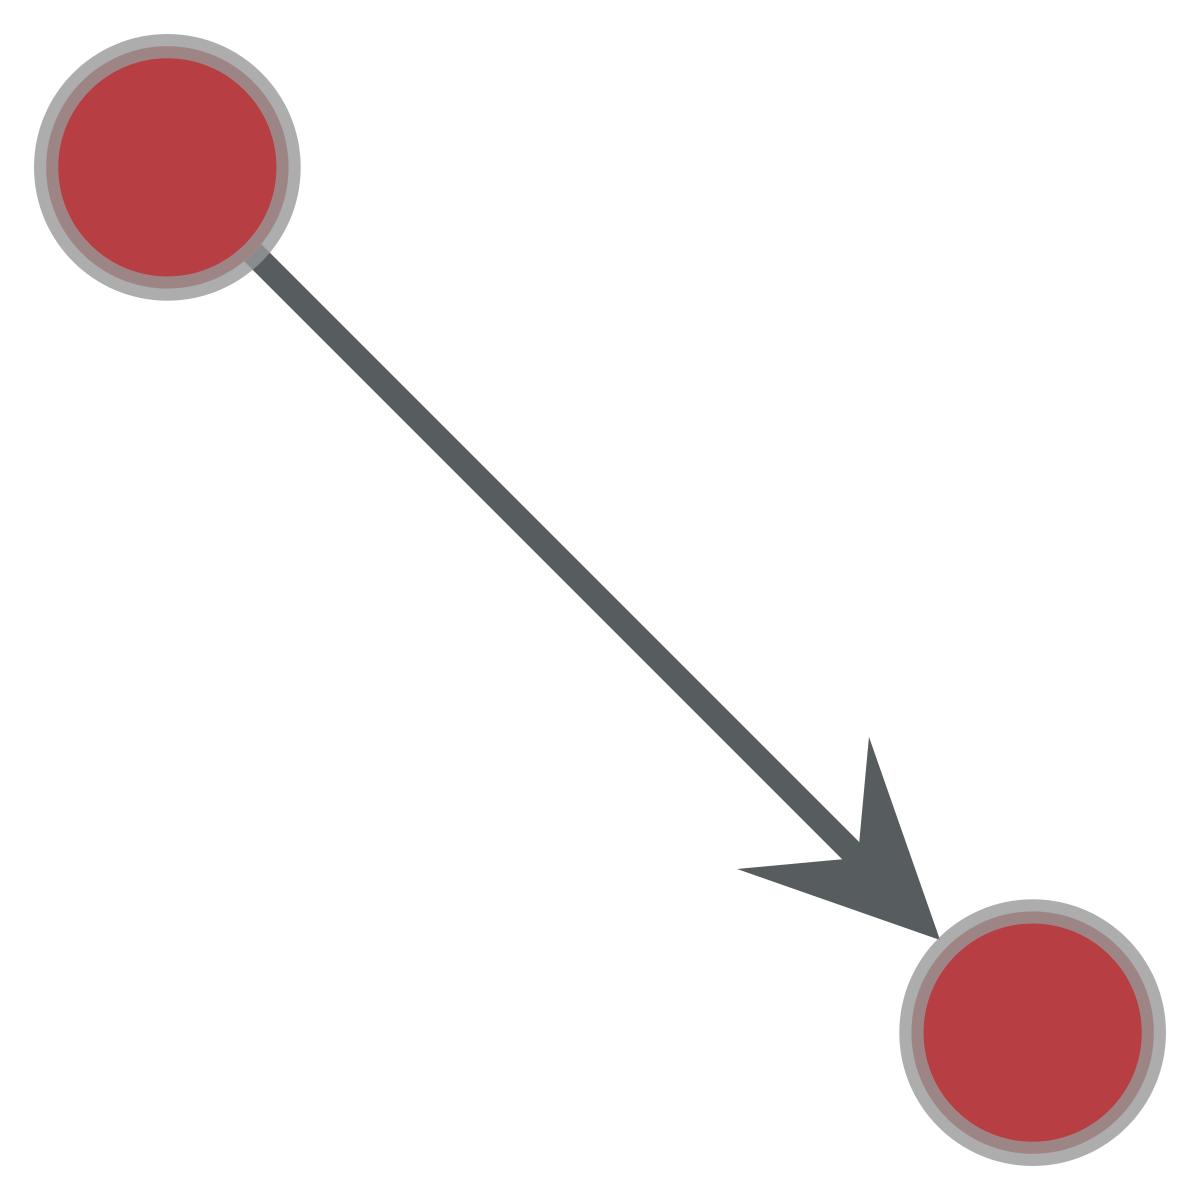

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x16cfe9550, at 0x16cfe93d0>

In [42]:
ug = gt.Graph()
# genders = ['M','F']
# for gen in genders:
m = ug.add_vertex()
f = ug.add_vertex()
    
    # name[gen] = gen
    # kind[e] = 2
e = ug.add_edge(m,f)
gt.graph_draw(ug)